# Oncoprint

In [1]:
library(tidyverse)
library(ggplot2)
library(ComplexHeatmap)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: grid

ComplexHeatmap version 2.13.1
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero eff

## Cargar los datos

### FREEC

In [48]:
df = read_csv("/home/fer/Documents/cfDNA/Programs/FREEC/oncoprint.csv",col_names = FALSE)

#borrar filas vacias
df <- df[rowSums(is.na(df)) != ncol(df),]
head(df)

Rows: 426 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (23): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,NA,Response to QX,Partial,Complete,NA,Partial,Partial,Partial,NA,⋯,Partial,NA,Disease in progression,NA,NA,NA,Disease in progression,NA,NA,NA
NA,NA,Sex,Female,Female,Female,Female,Male,Female,Female,⋯,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female
NA,NA,Stadium,I,IA,IIA,IIA,IIIC,IIA,NA,⋯,IIIB,IIIB,IIIB,IIB,IIA,IIA,IIB,NA,IIB,NA
NA,NA,Age,76,55,51,55,68,42,68,⋯,83,70,59,70,73,49,47,NA,81,60
Pathway,Regions,Genes,UEB_0205,UEB_0208,UEB_0209,UEB_0210,UEB_0211,UEB_0213,UEB_0214,⋯,UEB_0218,UEB_0219,UEB_0220,UEB_0221,UEB_0222,UEB_0223,UEB_0224,UEB_0226,UEB_0227,UEB_0228
NA,"Xq21,1",ATRX,NA,NA,NA,NA,loss,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [49]:
age = as.list(df[4,])
age = age[-c(1:3)]
age = as.numeric(age)

stadium = as.list(df[3,])
stadium = stadium[-c(1:3)]
stadium = as.character(stadium)

sex= as.list(df[2,])
sex = sex[-c(1:3)]
sex = as.character(sex)

response = as.list(df[1,])
response = response[-c(1:3)]
response = as.character(response)

regions = as.list(df$X2)
# Elimina los valores vacios que estan empezando la lista
regions = regions[-c(1:5)]
regions = as.character(regions)

regions2 = as.list(df$X1)
regions2 = regions2[-c(1:5)]
regions2 = as.character(regions2)
regions2


[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[26] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA

In [50]:
mat <- df[-c(1,2,3,4), -c(1,2)]
mat=as.matrix(mat)
rownames(mat) = mat[, 1]
colnames(mat) = mat[1, ]
mat = mat[-1,-1]
mat[is.na(mat)] = ""
mat

,UEB_0205,UEB_0208,UEB_0209,UEB_0210,UEB_0211,UEB_0213,UEB_0214,UEB_0215,UEB_0216,UEB_0217,UEB_0218,UEB_0219,UEB_0220,UEB_0221,UEB_0222,UEB_0223,UEB_0224,UEB_0226,UEB_0227,UEB_0228
ATRX,,,,,loss,,,,,,,,,,,,,,,
BCOR,,,,,loss,,,,,,,,,,,,,,,
CRLF2,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss
DAXX,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss
DDX3X,,,,,loss,,,,,,,,,,,,,,,
EIF1AX,,,,,loss,,,,,,,,,,,,,,,
ELF4,,,,,loss,,,,,,,,,,,,,,,
FCGR2B,,,,,,,,,gain,,,,,gain,,,,,,
FLI1,,,gain,,,,,,,,,,,,,,,,,
FLT3,,,,loss,,,,,,,,,,,,,,,,


In [51]:
# just for demonstration
col = c("loss" = "blue", "gain" = "red")
alter_fun = list(
    background = alter_graphic("rect", fill = "#CCCCCC"),   
    loss = alter_graphic("rect", fill = col["loss"]),
    gain = alter_graphic("rect", fill = col["gain"])
)

In [52]:
options(repr.plot.width = 10, repr.plot.height = 10)
heatmap_legend_param = list(title = "Alternations", at = c("loss", "gain"), 
        labels = c("Loss", "Gain"))

All mutation types: loss, gain.

`alter_fun` is assumed vectorizable. If it does not generate correct
plot, please set `alter_fun_is_vectorized = FALSE` in `oncoPrint()`.



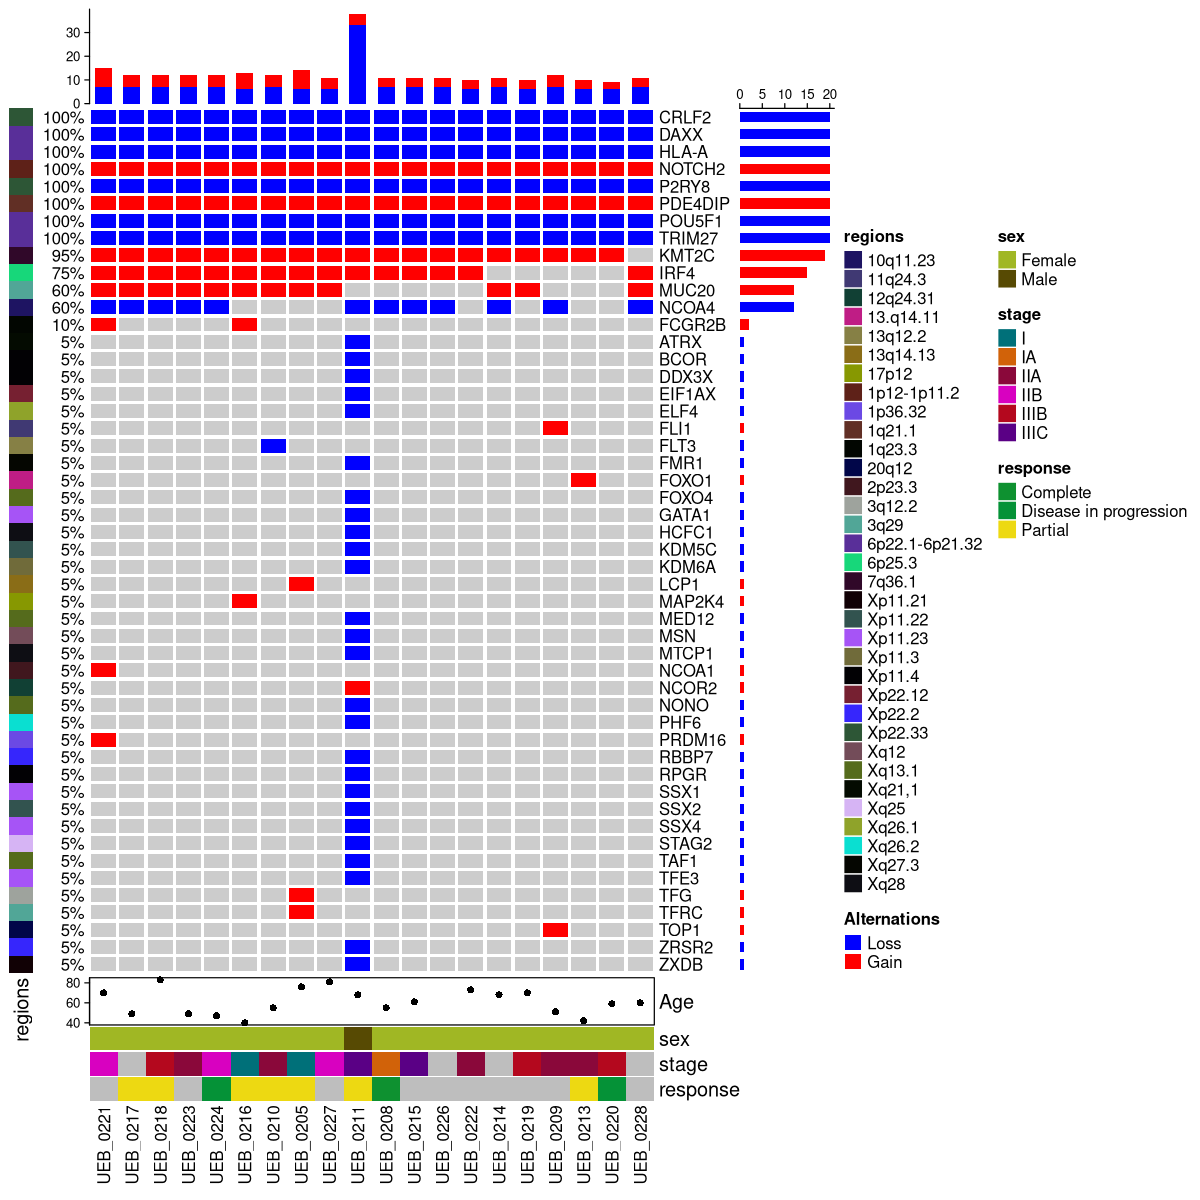

In [53]:
options(repr.plot.width = 10, repr.plot.height = 10)
oncoPrint(mat,
    alter_fun = alter_fun, col = col,show_column_names = TRUE,
    remove_empty_columns = TRUE, remove_empty_rows = TRUE,
    bottom_annotation = HeatmapAnnotation(Age = anno_points(c(age)), sex = sex, stage = stadium, 
                                          response = response
    ),
    left_annotation = rowAnnotation(regions = regions),
    heatmap_legend_param = heatmap_legend_param)

### QDNAseq

In [7]:
df = read_csv("/home/fer/Documents/cfDNA/Oncoprint.csv")
#eliminar las columnas que estan hasta abajo
mat =df
mat[is.na(mat)] = ""
mat = mat[,-1]
mat=as.matrix(mat)
rownames(mat) = mat[, 1]
mat = mat[,-1]
mat

New names:
* `` -> ...1

Rows: 22 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (22): ...1, All_Genes, UEB_0205_50kb_sqrt, UEB_0208_50kb_sqrt, UEB_0209_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,UEB_0205_50kb_sqrt,UEB_0208_50kb_sqrt,UEB_0209_50kb_sqrt,UEB_0210_50kb_sqrt,UEB_0211_50kb_sqrt,UEB_0213_50kb_sqrt,UEB_0214_50kb_sqrt,UEB_0215_50kb_sqrt,UEB_0216_50kb_sqrt,UEB_0217_50kb_sqrt,UEB_0218_50kb_sqrt,UEB_0219_50kb_sqrt,UEB_0220_50kb_sqrt,UEB_0221_50kb_sqrt,UEB_0222_50kb_sqrt,UEB_0223_50kb_sqrt,UEB_0224_50kb_sqrt,UEB_0226_50kb_sqrt,UEB_0227_50kb_sqrt,UEB_0228_50kb_sqrt
,,,,,,,,,,,,,,,,,,,,
ARID1A,,,,,,,,,,,,DEL,,,,,,,,
ARNT,,,DEL,,,,,,,,DEL,,,,,,,,,
BMPR2,,,,,,,,,,,DEL,,,,,,,,,
CASP8,,,,,DEL,,,,,,DEL,,,,,,,,,
CHD4,DEL,,DEL,,DEL,,DEL,,,,,,,,,,,,,
DAXX,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL
FUS,,,DEL,,,,,DEL,,,,,,,,,,,,
HLA-A,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL,DEL
MALAT1,,DEL,DEL,,DEL,,DEL,,DEL,,,DEL,,,,DEL,,,,DEL


In [26]:
# just for demonstration
col = c("DEL" = "blue", "DUP" = "red")
alter_fun = list(
    background = alter_graphic("rect", fill = "#CCCCCC"),   
    DEL = alter_graphic("rect", fill = col["DEL"]),
    DUP = alter_graphic("rect", fill = col["DUP"])
)

In [27]:
options(repr.plot.width = 10, repr.plot.height = 7)
column_title = "OncoPrint"
heatmap_legend_param = list(title = "Alternations", at = c("DEL", "DUP"), 
        labels = c("Deletion", "Duplication"))

In [28]:
oncoPrint(mat,
    alter_fun = alter_fun, col = col, show_column_names = TRUE,
    remove_empty_columns = TRUE, remove_empty_rows = TRUE,
    column_title = column_title, heatmap_legend_param = heatmap_legend_param)
#column_names_rot = 45

Found NA values in the matrix and treat as no alteration. If `NA` means
no alteration, you can explicitly set it to empty strings like ''. If
`NA` is an alteration type, you should format it to a string like
`'NA'` and define graphics for it.

All mutation types: loss, gain.



ERROR: Error: You should define graphic function for: loss, gain


In [29]:
options(repr.plot.width = 10, repr.plot.height = 7)
oncoPrint(mat,
    alter_fun = alter_fun, col = col,show_column_names = TRUE,
    remove_empty_columns = TRUE, remove_empty_rows = TRUE,
    top_annotation = HeatmapAnnotation(cbar = anno_oncoprint_barplot(),
        Age = anno_points(c(76, 55, 51,55, 68,42,68,61,40,49,83,70,59,70,73,49,47,NA,81,60)), height = unit(3, "cm")
    ),
    column_title = column_title, heatmap_legend_param = heatmap_legend_param)

Found NA values in the matrix and treat as no alteration. If `NA` means
no alteration, you can explicitly set it to empty strings like ''. If
`NA` is an alteration type, you should format it to a string like
`'NA'` and define graphics for it.

All mutation types: loss, gain.



ERROR: Error: You should define graphic function for: loss, gain


In [ ]:
split = data.frame(rep(c("A", "B"), 9), rep(c("C", "D"), each = 9))
Heatmap(mat, name = "mat", row_split = split, row_title = "%s|%s")

# IchorCNA
## 1000kb

In [26]:
df = read_csv("/home/fer/Documents/Code/cfDNA/prueba/Oncoprint.csv",col_names = FALSE)

#borrar filas vacias
df <- df[rowSums(is.na(df)) != ncol(df),]
head(df)

Rows: 39 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): X1, X2, X3, X4, X5

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5
<chr>,<chr>,<chr>,<chr>,<chr>
NA,All_Genes,UEB_0205,UEB_0208,UEB_0209
Tipo,NA,NA,NA,NA
Tipo,AKT2,NA,loss,NA
Tipo,ARHGAP35,NA,loss,NA
Tipo,BCL3,NA,loss,NA
Tipo,BRD4,NA,loss,NA


In [29]:
mat <- df[, -c(1)]
mat=as.matrix(mat)
colnames(mat) = mat[1, ]
rownames(mat) = mat[, 1]
mat[is.na(mat)] = ""
mat = mat[-c(1,2),-1]
mat

,UEB_0205,UEB_0208,UEB_0209
AKT2,,loss,
ARHGAP35,,loss,
BCL3,,loss,
BRD4,,loss,
CARM1,,loss,
CBLC,,loss,
CCNE1,,loss,
CD79A,,loss,
CEBPA,,loss,
CIC,,loss,


In [30]:
# just for demonstration
col = c("loss" = "blue", "gain" = "red")
alter_fun = list(
    background = alter_graphic("rect", fill = "#CCCCCC"),   
    loss = alter_graphic("rect", fill = col["loss"]),
    gain = alter_graphic("rect", fill = col["gain"])
)

In [31]:
options(repr.plot.width = 10, repr.plot.height = 10)
heatmap_legend_param = list(title = "Alternations", at = c("loss", "gain"), 
        labels = c("Loss", "Gain"))

All mutation types: loss.

`alter_fun` is assumed vectorizable. If it does not generate correct
plot, please set `alter_fun_is_vectorized = FALSE` in `oncoPrint()`.

Following `at` are removed: gain, because no color was defined for
them.

Following `at` are removed: gain, because no color was defined for
them.

Following `at` are removed: gain, because no color was defined for
them.



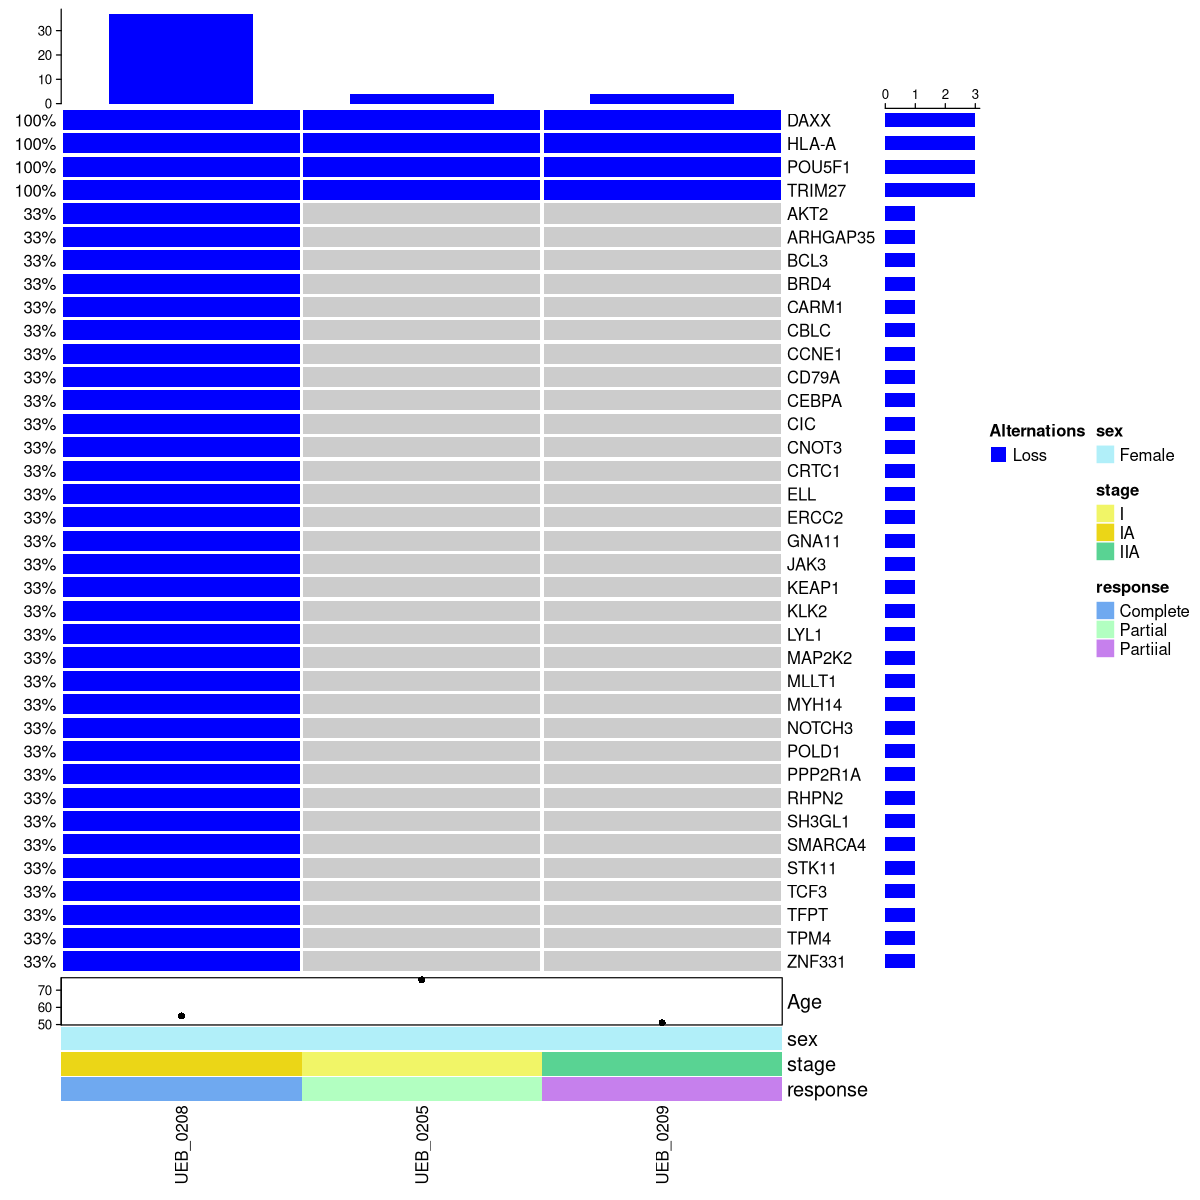

In [33]:
options(repr.plot.width = 10, repr.plot.height = 10)
oncoPrint(mat,
    alter_fun = alter_fun, col = col,show_column_names = TRUE,
    remove_empty_columns = TRUE, remove_empty_rows = TRUE,
    bottom_annotation = HeatmapAnnotation(Age = anno_points(c(76,55,51)), sex = c('Female', 'Female', 'Female'),
                                          stage = c('I','IA','IIA'), response = c('Partial', 'Complete', 'Partiial')
    ),
    #left_annotation = rowAnnotation(regions = regions),
    heatmap_legend_param = heatmap_legend_param)

## 500kb

In [16]:
df = read_csv("/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/OncoprintFilter.csv",col_names = FALSE)

#borrar filas vacias
df <- df[rowSums(is.na(df)) != ncol(df),]
head(df)

Rows: 330 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (21): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...
lgl  (1): X22

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
All_Genes,UEB_0205,UEB_0208,UEB_0209,UEB_0210,UEB_0211,UEB_0213,UEB_0214,UEB_0215,UEB_0216,⋯,UEB_0219,UEB_0220,UEB_0221,UEB_0222,UEB_0223,UEB_0224,UEB_0226,UEB_0227,UEB_0228,NA
ARID1A,NA,NA,NA,NA,NA,NA,loss,NA,NA,⋯,loss,NA,NA,NA,NA,NA,NA,NA,NA,NA
ATR,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
BRCA1,NA,NA,loss,loss,loss,NA,loss,NA,NA,⋯,loss,NA,NA,NA,NA,NA,NA,NA,loss,NA
BRCA2,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CDH1,NA,loss,loss,NA,NA,loss,NA,NA,NA,⋯,NA,NA,loss,NA,loss,NA,loss,NA,NA,NA


In [17]:
mat <- df
mat=as.matrix(mat)
colnames(mat) = mat[1, ]
rownames(mat) = mat[, 1]
mat[is.na(mat)] = ""
mat = mat[-c(1,2),-1]
mat

,UEB_0205,UEB_0208,UEB_0209,UEB_0210,UEB_0211,UEB_0213,UEB_0214,UEB_0215,UEB_0216,UEB_0217,⋯,UEB_0219,UEB_0220,UEB_0221,UEB_0222,UEB_0223,UEB_0224,UEB_0226,UEB_0227,UEB_0228,NA
ATR,,,,,,,,,,,⋯,,,,,,,,,,
BRCA1,,,loss,loss,loss,,loss,,,loss,⋯,loss,,,,,,,,loss,
BRCA2,,,,,,,,,,,⋯,,,,,,,,,,
CDH1,,loss,loss,,,loss,,,,,⋯,,,loss,,loss,,loss,,,
CDK12,,,loss,loss,loss,,loss,,,loss,⋯,loss,,,,,,,,loss,
CDKN2C,,,,,,,loss,,,loss,⋯,loss,,,,,,,,,
CHEK2,,,,loss,,,,,,loss,⋯,loss,,,,,,,,,
CTCF,,loss,loss,,,loss,,,,,⋯,,,loss,,loss,,loss,,,
EP300,,,,loss,,,,,,loss,⋯,loss,,,,,,,,,
HNF1A,,,,,,,,,,,⋯,loss,,,,,,,,,


In [18]:
# just for demonstration
col = c("loss" = "blue", "gain" = "red")
alter_fun = list(
    background = alter_graphic("rect", fill = "#CCCCCC"),   
    loss = alter_graphic("rect", fill = col["loss"]),
    gain = alter_graphic("rect", fill = col["gain"])
)

In [19]:
options(repr.plot.width = 10, repr.plot.height = 10)
heatmap_legend_param = list(title = "Alternations", at = c("loss", "gain"), 
        labels = c("Loss", "Gain"))

All mutation types: loss.

`alter_fun` is assumed vectorizable. If it does not generate correct
plot, please set `alter_fun_is_vectorized = FALSE` in `oncoPrint()`.

Following `at` are removed: gain, because no color was defined for
them.

Following `at` are removed: gain, because no color was defined for
them.

Following `at` are removed: gain, because no color was defined for
them.



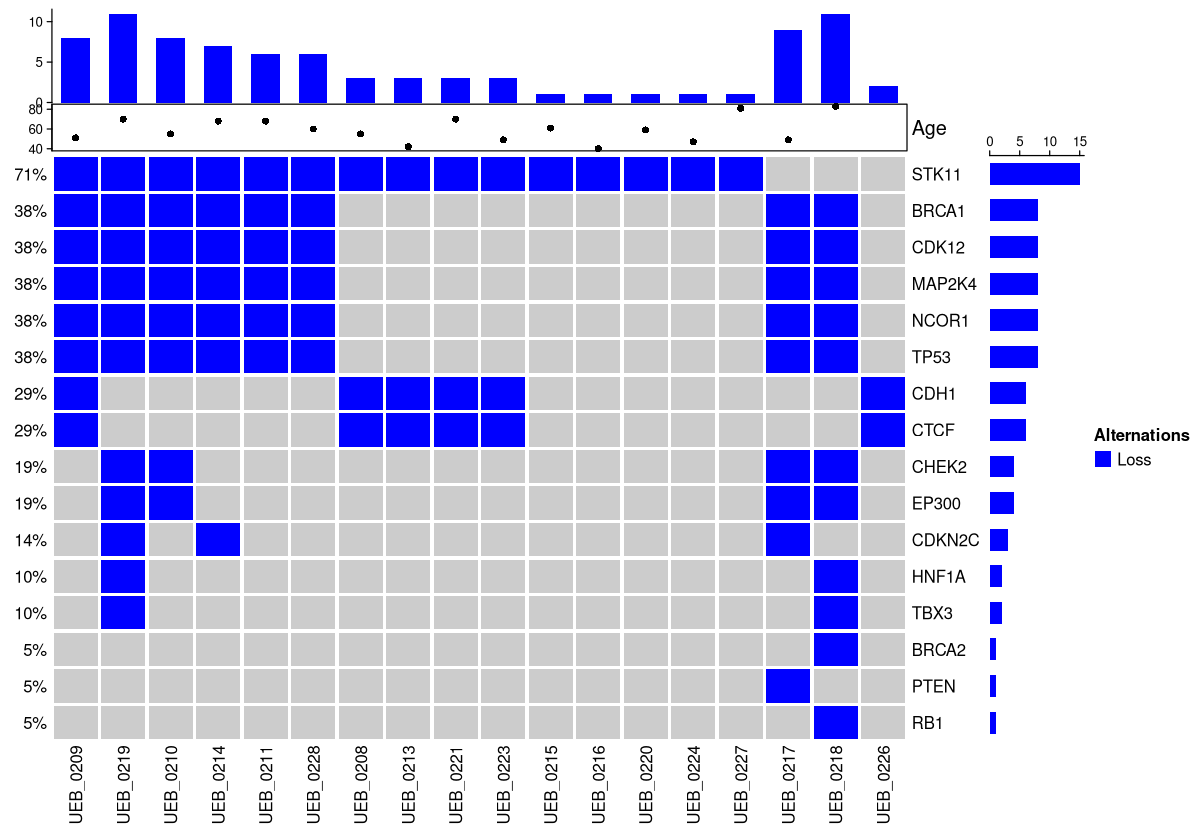

In [20]:
options(repr.plot.width = 10, repr.plot.height = 7)
oncoPrint(mat,
    alter_fun = alter_fun, col = col,show_column_names = TRUE,
    remove_empty_columns = TRUE, remove_empty_rows = TRUE,
    top_annotation = HeatmapAnnotation(cbar = anno_oncoprint_barplot(),
        Age = anno_points(c(76, 55, 51,55, 68,42,68,61,40,49,83,70,59,70,73,49,47,NA,81,60)), height = unit(3, "cm")
    ), heatmap_legend_param = heatmap_legend_param)

# Tumor

In [54]:
df = read_csv("/home/fer/Documents/cfDNA/Oncoprint_Tumor.csv",col_names = FALSE)

#borrar filas vacias]
df <- df[rowSums(is.na(df)) != ncol(df),]
head(df)

Rows: 18 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): X1, X2, X3, X4, X5, X6, X7, X8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Position,Gen,UEB_0227,UEB_0205,UEB_0208,UEB_0216,UEB_0214,UEB_0210
chrX,ATRX,loss,loss,NA,NA,NA,NA
chr19,STK11,NA,NA,NA,loss,NA,NA
ch13,BRCA2,loss,NA,NA,NA,NA,NA
chrX,PHF6,loss,loss,NA,NA,NA,NA
chrX,STAG2,loss,loss,NA,NA,NA,NA


In [55]:
gen = as.list(df$X2)
# Elimina los valores vacios que estan empezando la lista
gen = gen[-c(1)]
gen = as.character(gen)


chr = as.list(df$X1)
# Elimina los valores vacios que estan empezando la lista
chr = chr[-c(1)]
chr = as.character(chr)

In [56]:
mat <- df[-c(1)]
mat=as.matrix(mat)
rownames(mat) = mat[, 1]
colnames(mat) = mat[1, ]
mat = mat[-1,-1]
mat[is.na(mat)] = ""
mat

,UEB_0227,UEB_0205,UEB_0208,UEB_0216,UEB_0214,UEB_0210
ATRX,loss,loss,,,,
STK11,,,,loss,,
BRCA2,loss,,,,,
PHF6,loss,loss,,,,
STAG2,loss,loss,,,,
CDK12,loss,,,,,
RB1,loss,,,,,
BRCA1,loss,,,loss,,
EP300,loss,,,,,
KDM5C,,loss,,,,


In [57]:
# just for demonstration
col = c("loss" = "blue", "gain" = "red")
alter_fun = list(
    background = alter_graphic("rect", fill = "#CCCCCC"),   
    loss = alter_graphic("rect", fill = col["loss"]),
    gain = alter_graphic("rect", fill = col["gain"])
)

In [58]:
options(repr.plot.width = 10, repr.plot.height = 10)
heatmap_legend_param = list(title = "Alternations", at = c("loss", "gain"), 
        labels = c("Loss", "Gain"))

All mutation types: loss.

`alter_fun` is assumed vectorizable. If it does not generate correct
plot, please set `alter_fun_is_vectorized = FALSE` in `oncoPrint()`.

Following `at` are removed: gain, because no color was defined for
them.

Following `at` are removed: gain, because no color was defined for
them.

Following `at` are removed: gain, because no color was defined for
them.



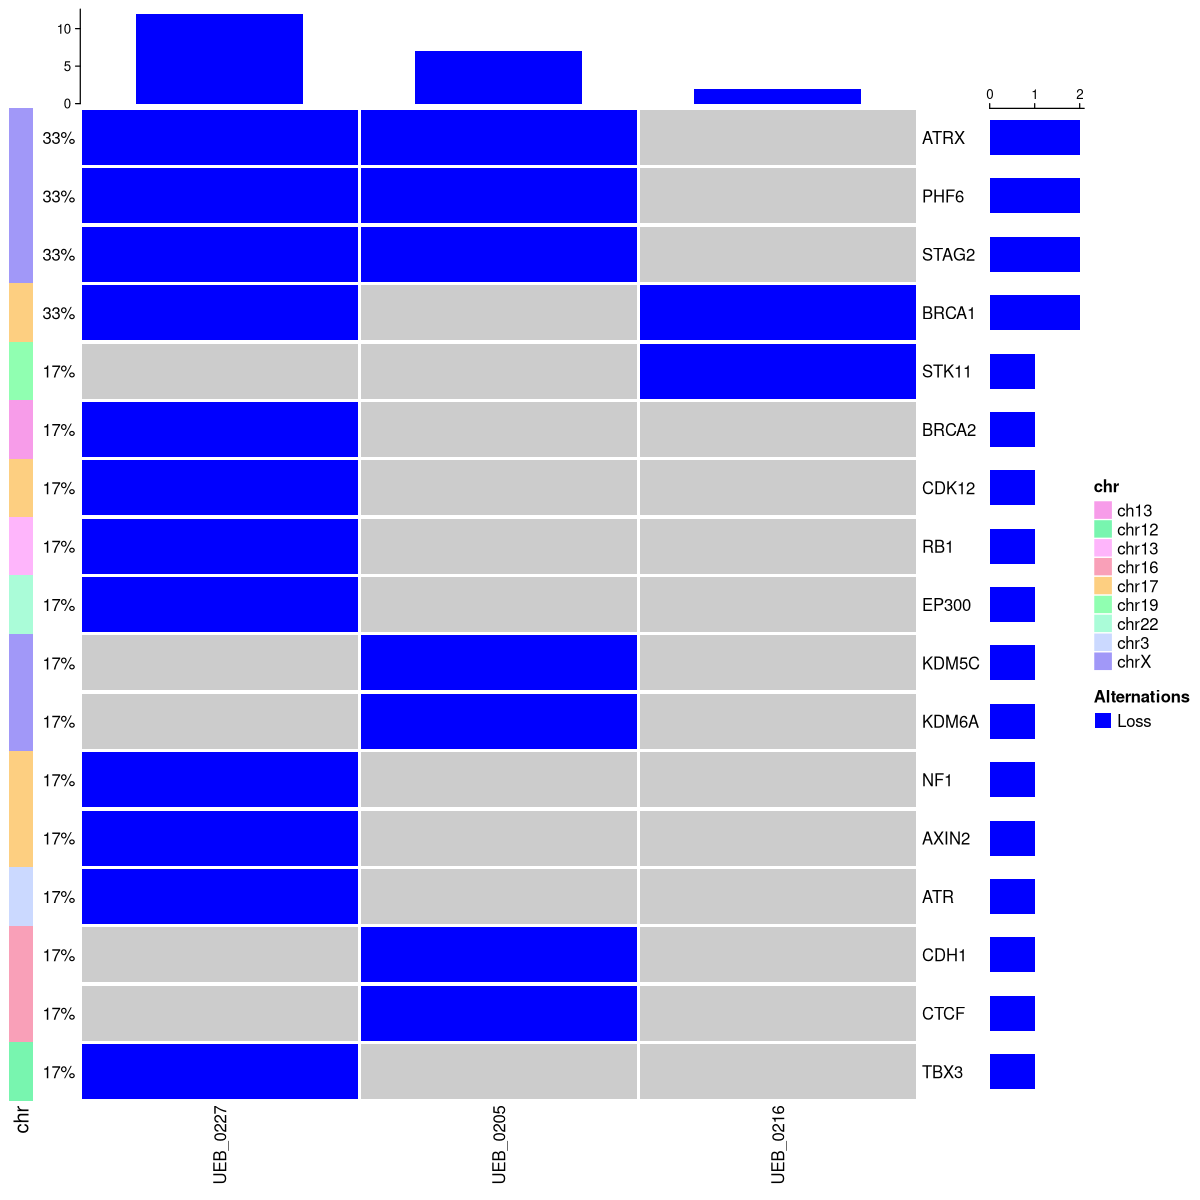

In [61]:
options(repr.plot.width = 10, repr.plot.height = 10)
oncoPrint(mat,
    alter_fun = alter_fun, col = col,show_column_names = TRUE,
    remove_empty_columns = TRUE, remove_empty_rows = TRUE,
    #left_annotation = rowAnnotation(regions = regions),
    left_annotation = rowAnnotation(chr = chr),
    heatmap_legend_param = heatmap_legend_param)

# ichorCNA 55 genes

In [3]:
df = read_csv("/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/Oncoprint55genes_cito.csv",col_names = FALSE)

#borrar filas vacias
df <- df[rowSums(is.na(df)) != ncol(df),]

# Extraer las filas y columnas para las anotaciones
funct <- df$X1
status <- df$X3
cytoband <- df$X4

tumorfract <- as.list(df[1,])
Status <- as.list(df[2,])
m <- as.list(df[3,])
n <- as.list(df[4,])
t <- as.list(df[5,])
progresion <- as.list(df[6,])
histological <- as.list(df[7,])
response <- as.list(df[8,])
sex <- as.list(df[9,])
stage <- as.list(df[10,])
age <- as.list(df[11,])


# Borrar las filas inecearias para el Heatmap
df <-  df[-c(1:11), -c(1,3,4)]

head(df)

Rows: 68 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X2,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ID,UEB_0208,UEB_0209,UEB_0210,UEB_0211,UEB_0213,UEB_0214,UEB_0215,UEB_0217,UEB_0218,UEB_0219,UEB_0221,UEB_0223,UEB_0226,UEB_0228
gene,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AKT3,NA,NA,NA,NA,NA,loss,NA,loss,NA,loss,NA,NA,NA,NA
ARHGAP35,NA,NA,loss,NA,NA,NA,loss,NA,NA,loss,NA,NA,NA,NA
ARID1A,NA,NA,NA,NA,NA,loss,NA,loss,NA,loss,NA,NA,NA,NA
ARID2,NA,NA,NA,NA,NA,NA,NA,NA,loss,loss,NA,NA,NA,NA


In [4]:
# Elimnado de valores indeseados en las columnas
status <- status[-c(1:13)]
cytoband <- cytoband[-c(1:13)]
funct <- funct[-c(1:13)]


# Elimnado valores indeseados en las filas
response <- response[-c(1:4)]
response = as.character(response)
sex <- sex[-c(1:4)]
sex = as.character(sex)
stage <- stage[-c(1:4)]
stage = as.character(stage)
age <- age[-c(1:4)]
age = as.numeric(age)

progresion <- progresion[-c(1:4)]
progresion = as.character(progresion)
histological  <- histological [-c(1:4)]
histological  = as.character(histological)


tumorfract <- tumorfract[-c(1:4)]
tumorfract = as.numeric(tumorfract)

Status <- Status[-c(1:4)]
Status = as.character(Status)

m <- m[-c(1:4)]
m = as.numeric(m)

n <- n[-c(1:4)]
n = as.numeric(n)

t <- t[-c(1:4)]
t = as.numeric(t)

In [8]:
mat <- df
mat=as.matrix(mat)
rownames(mat) = mat[, 1]
colnames(mat) = mat[1, ]
mat = mat[-c(1,2),-1]
mat[is.na(mat)] = ""
head(mat)

,UEB_0208,UEB_0209,UEB_0210,UEB_0211,UEB_0213,UEB_0214,UEB_0215,UEB_0217,UEB_0218,UEB_0219,UEB_0221,UEB_0223,UEB_0226,UEB_0228
AKT3,,,,,,loss,,loss,,loss,,,,
ARHGAP35,,,loss,,,,loss,,,loss,,,,
ARID1A,,,,,,loss,,loss,,loss,,,,
ARID2,,,,,,,,,loss,loss,,,,
BRCA1,,loss,loss,loss,,loss,,loss,,loss,,,,loss
BRCA2,,,,,,,,,loss,,,,,


In [9]:
# just for demonstration
col = c("loss" = "#2e81c6", "gain" = "red")
alter_fun = list(
    background = alter_graphic("rect", fill = "#CCCCCC"),   
    loss = alter_graphic("rect", fill = col["loss"]),
    gain = alter_graphic("rect", fill = col["gain"])
)

In [23]:
options(repr.plot.width = 10, repr.plot.height = 10)
heatmap_legend_param = list(title = "Alteration", at = c("loss", "gain"), 
        labels = c("Loss", "Gain"))

All mutation types: loss.

`alter_fun` is assumed vectorizable. If it does not generate correct
plot, please set `alter_fun_is_vectorized = FALSE` in `oncoPrint()`.

Following `at` are removed: gain, because no color was defined for
them.

Following `at` are removed: gain, because no color was defined for
them.

Following `at` are removed: gain, because no color was defined for
them.



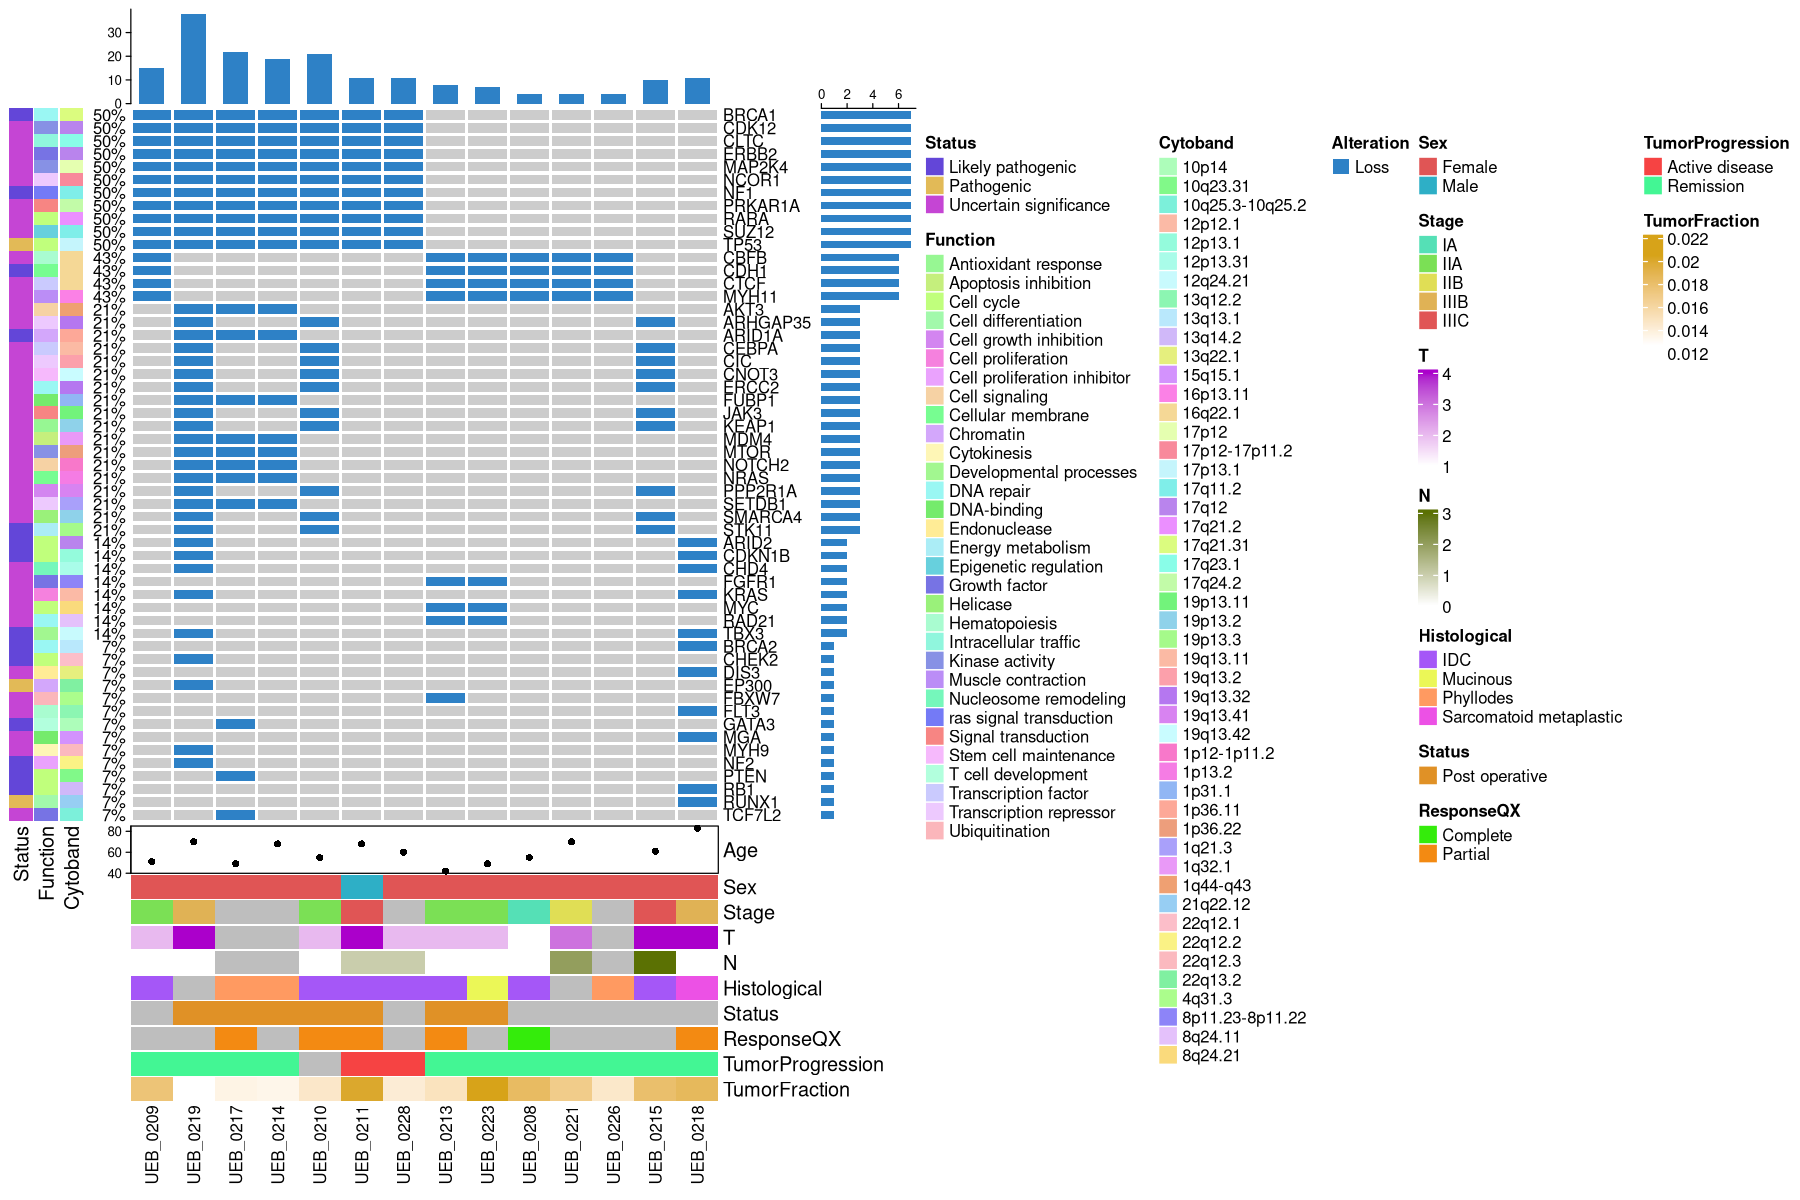

In [24]:
options(repr.plot.width = 15, repr.plot.height = 10)

oncoPrint(mat,
    alter_fun = alter_fun, col = col,show_column_names = TRUE,
    remove_empty_columns = TRUE, remove_empty_rows = TRUE,
    bottom_annotation = HeatmapAnnotation(Age = anno_points(c(age)), Sex = sex, Stage = stage,  T = t, N = n,
                                          Histological = histological,Status = Status, 
                                          ResponseQX = response, TumorProgression=progresion, 
                                          TumorFraction = tumorfract,
                                          col = list(Sex = c("Female" = "#e05555", "Male" = "#2eafc6"),
                                                    Stage = c("IA" = "#55e0b6", "IIA" = "#7be055", 
                                                             "IIB" = "#e0de55", "IIIB" = "#e0b255", 
                                                              "IIIC" = "#e05555"),
                                                    ResponseQX = c("Complete" = "#34ec0b", "Partial" = "#f38a12"), 
                                                    TumorProgression = c("Active disease" = "#f64343", 
                                                                         "Remission" = "#43f694"),
                                                     Histological = c("IDC" = "#a557f7", 
                                                                         "Mucinous" = "#ebf757",
                                                                      "Phyllodes" = "#ff9a61",
                                                                      "Sarcomatoid metaplastic" = "#ec51e5")
                                                    )
                                              ),       
    left_annotation = rowAnnotation(Status = status, Function = funct, Cytoband = cytoband),
    heatmap_legend_param = heatmap_legend_param)

# Filter por Status

In [165]:
df = read_csv("/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/Oncoprint20genes.csv",col_names = FALSE)

#borrar filas vacias
df <- df[rowSums(is.na(df)) != ncol(df),]

# Extraer las filas y columnas para las anotaciones
status <- df$X3
funct <- df$X1

progresion <- as.list(df[1,])
histological <- as.list(df[2,])
response <- as.list(df[3,])
sex <- as.list(df[4,])
stage <- as.list(df[5,])
age <- as.list(df[6,])

# Borrar las filas inecearias para el Heatmap
df <-  df[-c(1:6), -c(1,3)]

head(df)

Rows: 25 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X2,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ID,UEB_0208,UEB_0209,UEB_0210,UEB_0211,UEB_0213,UEB_0214,UEB_0215,UEB_0217,UEB_0218,UEB_0219,UEB_0221,UEB_0223,UEB_0226,UEB_0228
gene,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ARID1A,NA,NA,NA,NA,NA,loss,NA,loss,NA,loss,NA,NA,NA,NA
ARID2,NA,NA,NA,NA,NA,NA,NA,NA,loss,loss,NA,NA,NA,NA
BRCA1,NA,loss,loss,loss,NA,loss,NA,loss,NA,loss,NA,NA,NA,loss
BRCA2,NA,NA,NA,NA,NA,NA,NA,NA,loss,NA,NA,NA,NA,NA


In [166]:
# Elimnado de valores indeseados en las columnas
status <- status[-c(1:8)]
funct <- funct[-c(1:8)]

# Elimnado valores indeseados en las filas
response <- response[-c(1:3)]
response = as.character(response)
sex <- sex[-c(1:3)]
sex = as.character(sex)
stage <- stage[-c(1:3)]
stage = as.character(stage)
age <- age[-c(1:3)]
age = as.numeric(age)

progresion <- progresion[-c(1:3)]
progresion = as.character(progresion)
histological  <- histological [-c(1:3)]
histological  = as.character(histological)

In [167]:
mat <- df
mat=as.matrix(mat)
rownames(mat) = mat[, 1]
colnames(mat) = mat[1, ]
mat = mat[-c(1,2),-1]
mat[is.na(mat)] = ""
head(mat)

,UEB_0208,UEB_0209,UEB_0210,UEB_0211,UEB_0213,UEB_0214,UEB_0215,UEB_0217,UEB_0218,UEB_0219,UEB_0221,UEB_0223,UEB_0226,UEB_0228
ARID1A,,,,,,loss,,loss,,loss,,,,
ARID2,,,,,,,,,loss,loss,,,,
BRCA1,,loss,loss,loss,,loss,,loss,,loss,,,,loss
BRCA2,,,,,,,,,loss,,,,,
CDH1,loss,loss,,,loss,,,,,,loss,loss,loss,
CDKN1B,,,,,,,,,loss,loss,,,,


In [168]:
# just for demonstration
col = c("loss" = "#2e81c6", "gain" = "red")
alter_fun = list(
    background = alter_graphic("rect", fill = "#CCCCCC"),   
    loss = alter_graphic("rect", fill = col["loss"]),
    gain = alter_graphic("rect", fill = col["gain"])
)

In [169]:
options(repr.plot.width = 10, repr.plot.height = 10)
heatmap_legend_param = list(title = "Alteration", at = c("loss", "gain"), 
        labels = c("Loss", "Gain"))

All mutation types: loss.

`alter_fun` is assumed vectorizable. If it does not generate correct
plot, please set `alter_fun_is_vectorized = FALSE` in `oncoPrint()`.

Following `at` are removed: gain, because no color was defined for
them.

Following `at` are removed: gain, because no color was defined for
them.

Following `at` are removed: gain, because no color was defined for
them.



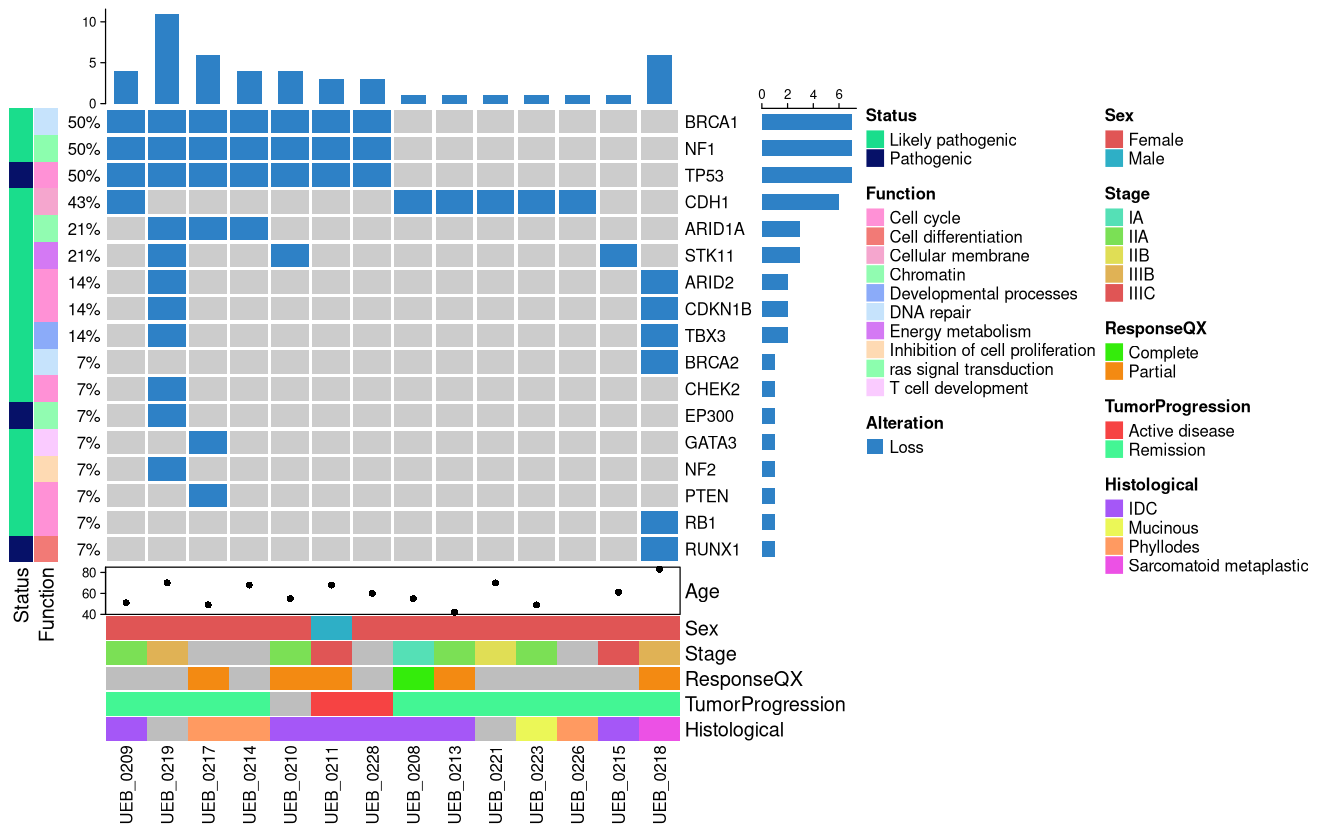

In [205]:
options(repr.plot.width = 11, repr.plot.height = 7)
#col = c("Likely pathogenic" = "red", "Pathogenic" = "blue")
oncoPrint(mat,
    alter_fun = alter_fun, col = col,show_column_names = TRUE,
    remove_empty_columns = TRUE, remove_empty_rows = TRUE,
    bottom_annotation = HeatmapAnnotation(Age = anno_points(c(age)), Sex = sex, Stage = stage, 
                                          ResponseQX = response, TumorProgression=progresion, 
                                          Histological = histological,
                                          col = list(Sex = c("Female" = "#e05555", "Male" = "#2eafc6"),
                                                    Stage = c("IA" = "#55e0b6", "IIA" = "#7be055", 
                                                             "IIB" = "#e0de55", "IIIB" = "#e0b255", 
                                                              "IIIC" = "#e05555"),
                                                    ResponseQX = c("Complete" = "#34ec0b", "Partial" = "#f38a12"), 
                                                    TumorProgression = c("Active disease" = "#f64343", 
                                                                         "Remission" = "#43f694"),
                                                     Histological = c("IDC" = "#a557f7", 
                                                                         "Mucinous" = "#ebf757",
                                                                      "Phyllodes" = "#ff9a61",
                                                                      "Sarcomatoid metaplastic" = "#ec51e5")
                                                    )
    ),
    left_annotation = rowAnnotation(Status = status, Function = funct 
                                    ),
    heatmap_legend_param = heatmap_legend_param)

# patogenicos

In [53]:
df = read_csv("/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/Oncoprint20genes_cito.csv",col_names = FALSE)

#borrar filas vacias
df <- df[rowSums(is.na(df)) != ncol(df),]

# Extraer las filas y columnas para las anotaciones
funct <- df$X1
status <- df$X3
cytoband <- df$X4

tumorfract <- as.list(df[1,])
Status <- as.list(df[2,])
m <- as.list(df[3,])
n <- as.list(df[4,])
t <- as.list(df[5,])
progresion <- as.list(df[6,])
histological <- as.list(df[7,])
response <- as.list(df[8,])
sex <- as.list(df[9,])
stage <- as.list(df[10,])
age <- as.list(df[11,])


# Borrar las filas inecearias para el Heatmap
df <-  df[-c(1:11), -c(1,3,4)]

head(df)

Rows: 30 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X2,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ID,UEB_0208,UEB_0209,UEB_0210,UEB_0211,UEB_0213,UEB_0214,UEB_0215,UEB_0217,UEB_0218,UEB_0219,UEB_0221,UEB_0223,UEB_0226,UEB_0228
gene,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ARID1A,NA,NA,NA,NA,NA,loss,NA,loss,NA,loss,NA,NA,NA,NA
ARID2,NA,NA,NA,NA,NA,NA,NA,NA,loss,loss,NA,NA,NA,NA
BRCA1,NA,loss,loss,loss,NA,loss,NA,loss,NA,loss,NA,NA,NA,loss
BRCA2,NA,NA,NA,NA,NA,NA,NA,NA,loss,NA,NA,NA,NA,NA


In [54]:
# Elimnado de valores indeseados en las columnas
status <- status[-c(1:13)]
cytoband <- cytoband[-c(1:13)]
funct <- funct[-c(1:13)]


# Elimnado valores indeseados en las filas
response <- response[-c(1:4)]
response = as.character(response)
sex <- sex[-c(1:4)]
sex = as.character(sex)
stage <- stage[-c(1:4)]
stage = as.character(stage)
age <- age[-c(1:4)]
age = as.numeric(age)

progresion <- progresion[-c(1:4)]
progresion = as.character(progresion)
histological  <- histological [-c(1:4)]
histological  = as.character(histological)


tumorfract <- tumorfract[-c(1:4)]
tumorfract = as.numeric(tumorfract)

Status <- Status[-c(1:4)]
Status = as.character(Status)

m <- m[-c(1:4)]
m = as.numeric(m)

n <- n[-c(1:4)]
n = as.numeric(n)

t <- t[-c(1:4)]
t = as.numeric(t)

In [55]:
mat <- df
mat=as.matrix(mat)
rownames(mat) = mat[, 1]
colnames(mat) = mat[1, ]
mat = mat[-c(1,2),-1]
mat[is.na(mat)] = ""
head(mat)

,UEB_0208,UEB_0209,UEB_0210,UEB_0211,UEB_0213,UEB_0214,UEB_0215,UEB_0217,UEB_0218,UEB_0219,UEB_0221,UEB_0223,UEB_0226,UEB_0228
ARID1A,,,,,,loss,,loss,,loss,,,,
ARID2,,,,,,,,,loss,loss,,,,
BRCA1,,loss,loss,loss,,loss,,loss,,loss,,,,loss
BRCA2,,,,,,,,,loss,,,,,
CDH1,loss,loss,,,loss,,,,,,loss,loss,loss,
CDKN1B,,,,,,,,,loss,loss,,,,


In [56]:
# just for demonstration
col = c("loss" = "#2e81c6", "gain" = "red")
alter_fun = list(
    background = alter_graphic("rect", fill = "#CCCCCC"),   
    loss = alter_graphic("rect", fill = col["loss"]),
    gain = alter_graphic("rect", fill = col["gain"])
)

In [57]:
options(repr.plot.width = 10, repr.plot.height = 10)
heatmap_legend_param = list(title = "Alteration", at = c("loss", "gain"), 
        labels = c("Loss", "Gain"))

All mutation types: loss.

`alter_fun` is assumed vectorizable. If it does not generate correct
plot, please set `alter_fun_is_vectorized = FALSE` in `oncoPrint()`.

Following `at` are removed: gain, because no color was defined for
them.

Following `at` are removed: gain, because no color was defined for
them.

Following `at` are removed: gain, because no color was defined for
them.



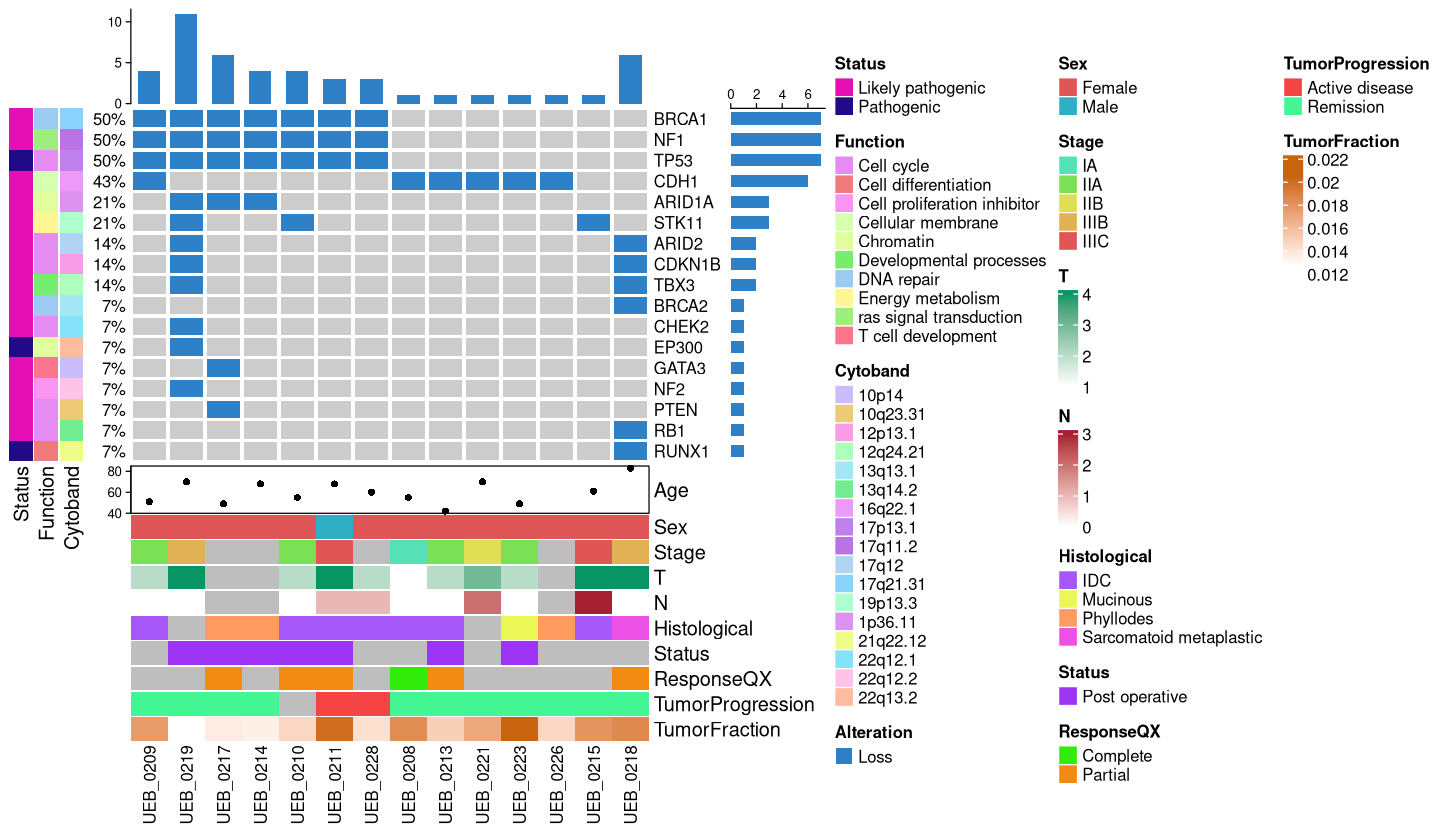

In [77]:
options(repr.plot.width = 12, repr.plot.height = 7)

oncoPrint(mat,
    alter_fun = alter_fun, col = col,show_column_names = TRUE,
    remove_empty_columns = TRUE, remove_empty_rows = TRUE,
    bottom_annotation = HeatmapAnnotation(Age = anno_points(c(age)), Sex = sex, Stage = stage,  T = t, N = n,
                                          Histological = histological,Status = Status, 
                                          ResponseQX = response, TumorProgression=progresion, 
                                          TumorFraction = tumorfract,
                                          col = list(Sex = c("Female" = "#e05555", "Male" = "#2eafc6"),
                                                    Stage = c("IA" = "#55e0b6", "IIA" = "#7be055", 
                                                             "IIB" = "#e0de55", "IIIB" = "#e0b255", 
                                                              "IIIC" = "#e05555"),
                                                    ResponseQX = c("Complete" = "#34ec0b", "Partial" = "#f38a12"), 
                                                    TumorProgression = c("Active disease" = "#f64343", 
                                                                         "Remission" = "#43f694"),
                                                     Histological = c("IDC" = "#a557f7", 
                                                                         "Mucinous" = "#ebf757",
                                                                      "Phyllodes" = "#ff9a61",
                                                                      "Sarcomatoid metaplastic" = "#ec51e5")
                                                    )
                                              ),       
    left_annotation = rowAnnotation(Status = status, Function = funct, Cytoband = cytoband),
    heatmap_legend_param = heatmap_legend_param)

# Tumor

In [32]:
df = read_csv('/home/fer/Documents/cfDNA/DriversTumor.csv')
mat <- df
mat=as.matrix(mat)
rownames(mat) = mat[, 1]
mat <- mat[,-1]
mat

Rows: 50 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): ID, UEB_0205, UEB_0208, UEB_0209, UEB_0210, UEB_0211, UEB_0214, UE...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,UEB_0205,UEB_0208,UEB_0209,UEB_0210,UEB_0211,UEB_0214,UEB_0215,UEB_0217,UEB_0220,UEB_0222
Gene,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AKT1,NA,NA,NA,NA,NA,NA,NA,gain,NA,NA
AR,NA,NA,NA,NA,NA,loss,NA,NA,NA,loss
ARID1A,NA,NA,NA,NA,NA,NA,NA,NA,NA,loss
ASXL1,NA,NA,NA,NA,NA,NA,NA,NA,NA,gain
ATRX,NA,NA,NA,NA,NA,loss,NA,NA,NA,loss
AXIN2,NA,NA,loss,NA,loss,NA,NA,NA,NA,gain
BRAF,NA,NA,NA,NA,NA,NA,NA,loss,NA,NA
BRCA1,NA,NA,loss,NA,loss,NA,NA,NA,NA,gain
BRCA2,NA,NA,NA,NA,NA,NA,NA,loss,NA,loss


In [37]:
# just for demonstration
col = c("loss" = "#2e81c6", "gain" = "red")
alter_fun = list(
    background = alter_graphic("rect", fill = "#e8e6e6"),   
    loss = alter_graphic("rect", fill = col["loss"]),
    gain = alter_graphic("rect", fill = col["gain"])
)

In [38]:
options(repr.plot.width = 10, repr.plot.height = 10)
heatmap_legend_param = list(title = "Alteration", at = c("loss", "gain"), 
        labels = c("Loss", "Gain"))

Found NA values in the matrix and treat as no alteration. If `NA` means
no alteration, you can explicitly set it to empty strings like ''. If
`NA` is an alteration type, you should format it to a string like
`'NA'` and define graphics for it.

All mutation types: loss, gain.

`alter_fun` is assumed vectorizable. If it does not generate correct
plot, please set `alter_fun_is_vectorized = FALSE` in `oncoPrint()`.



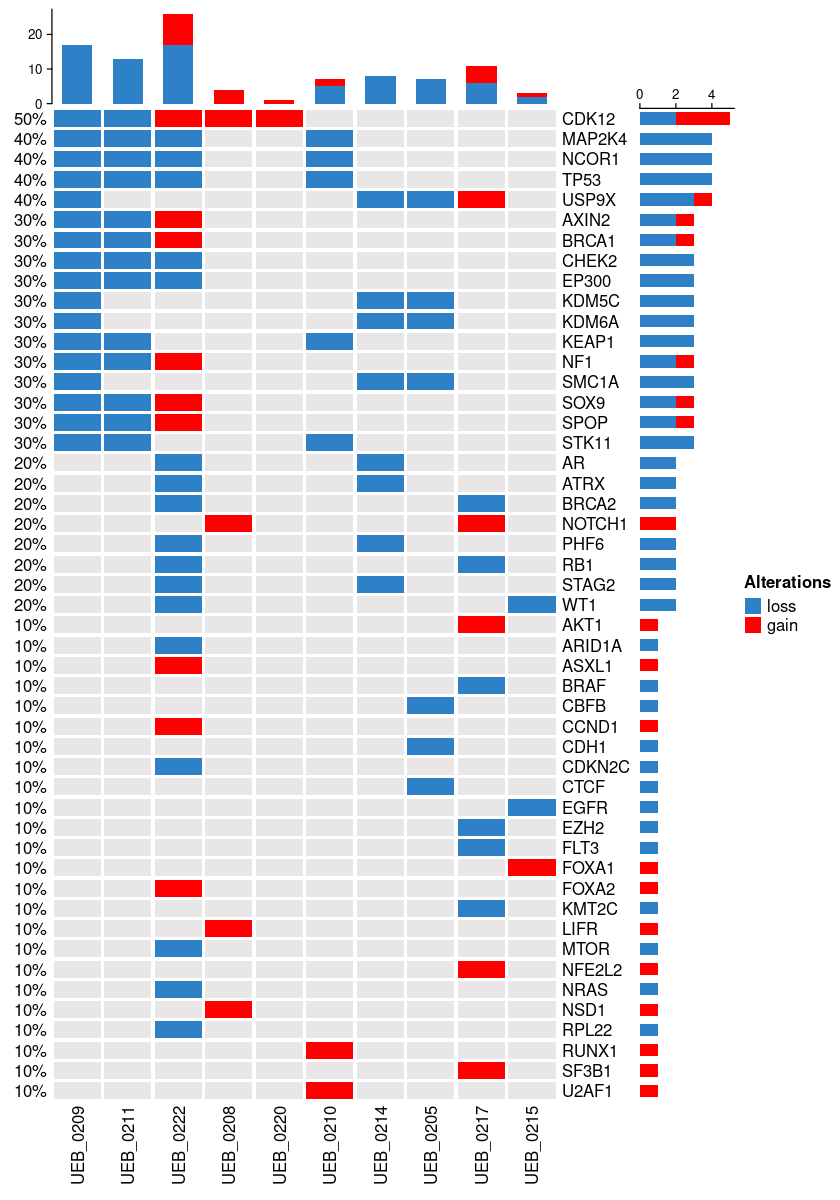

In [39]:
options(repr.plot.width = 7, repr.plot.height = 10)

oncoPrint(mat,
    alter_fun = alter_fun, col = col,show_column_names = TRUE,
    remove_empty_columns = TRUE, remove_empty_rows = TRUE)